In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scikit-learn as sklean
%matplotlib inline


Matplotlib is building the font cache; this may take a moment.


In [36]:
#pip install pandas


SyntaxError: invalid syntax (Temp/ipykernel_16660/3649573399.py, line 1)

In [4]:
#pip install seaborn


  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
Note: you may need to restart the kernel to use updated packages.


In [7]:
ship = pd.read_csv('train.csv')

In [8]:
ship.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

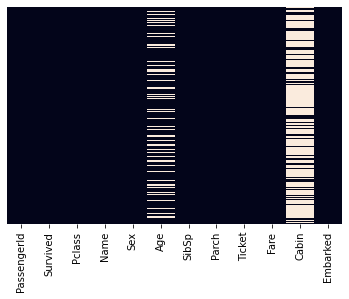

In [9]:
sns.heatmap(ship.isnull(),yticklabels=False,cbar=False)

<AxesSubplot:xlabel='Survived', ylabel='count'>

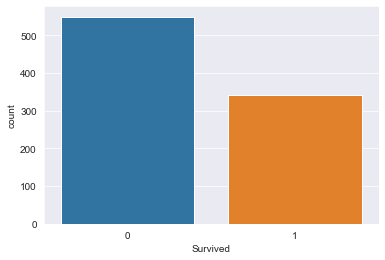

In [10]:
sns.set_style('darkgrid')
sns.countplot(x = 'Survived',data = ship)

<AxesSubplot:xlabel='Survived', ylabel='count'>

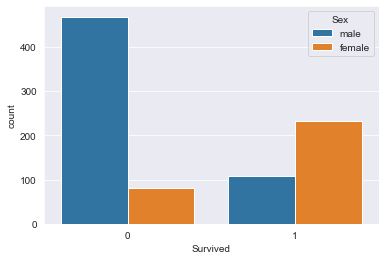

In [11]:
sns.set_style('darkgrid')
sns.countplot(x = 'Survived',data = ship,hue = 'Sex')

<AxesSubplot:xlabel='Survived', ylabel='count'>

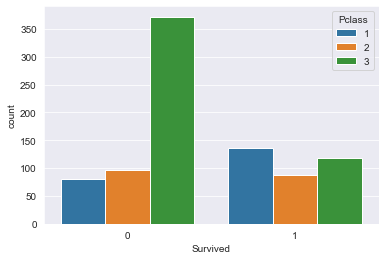

In [12]:
sns.set_style('darkgrid')
sns.countplot(x = 'Survived',data = ship,hue = 'Pclass')

<AxesSubplot:xlabel='AGE'>

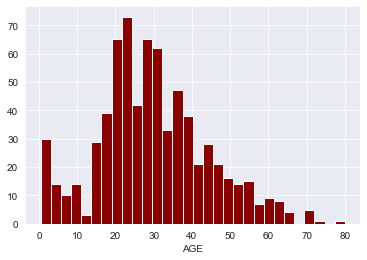

In [13]:
plt.xlabel('AGE')
ship['Age'].hist(bins = 30,color = 'darkred')

<AxesSubplot:xlabel='SibSp', ylabel='count'>

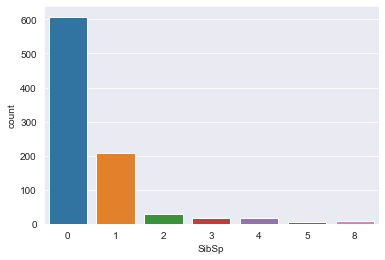

In [14]:
sns.countplot(x = 'SibSp',data = ship)

<AxesSubplot:xlabel='FARE'>

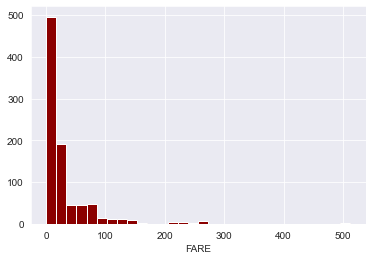

In [15]:
plt.xlabel('FARE')
ship['Fare'].hist(bins = 30,color = 'darkred')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

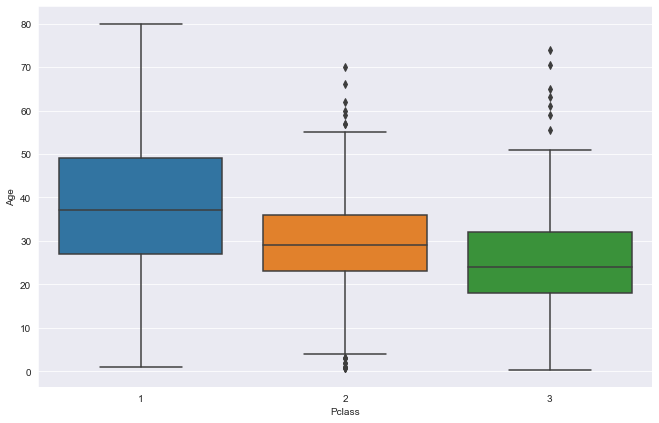

In [16]:
plt.figure(figsize=(11,7))
sns.boxplot(x = 'Pclass',y = 'Age',data = ship)

In [19]:
def func(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        if Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [20]:
ship['Age'] = ship[['Age','Pclass']].apply(func,axis=1)

<AxesSubplot:>

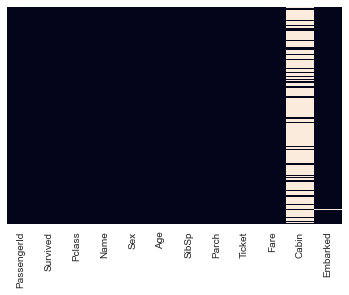

In [21]:
sns.heatmap(ship.isnull(),yticklabels=False,cbar=False)

In [22]:
ship.drop('Cabin',axis=1,inplace = True)

In [23]:
ship.dropna(inplace=True)

In [24]:
ship.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [25]:
sex = pd.get_dummies(ship['Sex'],drop_first=True)
embark = pd.get_dummies(ship['Embarked'],drop_first=True)

In [26]:
ship.drop(['Sex','Name','Ticket','Embarked'],axis=1,inplace=True)

In [27]:
ship = pd.concat([ship,sex,embark],axis=1)

In [28]:
ship.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [38]:
from sklearn.model_selection import train_test_split

In [37]:
#pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [39]:
X = ship[['PassengerId','Pclass','Age','SibSp','Parch','Fare','male','Q','S']]
y = ship['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
logmodel = LogisticRegression(max_iter=10000)

In [42]:
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [43]:
predictions = logmodel.predict(X_test)

In [44]:
from sklearn.metrics import classification_report,confusion_matrix

In [45]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85       184
           1       0.75      0.76      0.76       110

    accuracy                           0.82       294
   macro avg       0.80      0.81      0.80       294
weighted avg       0.82      0.82      0.82       294



In [46]:
print(confusion_matrix(y_test,predictions))

[[156  28]
 [ 26  84]]
